# Environment Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Create PATHs

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

ROOT_DIR = "/content/drive/My Drive/"
HOME_DIR = ROOT_DIR + "itu/PhD/BLG 641E - Medical Image Computing/final project/"

DATA_DIR = HOME_DIR + "data/"
TRAIN_DIR = DATA_DIR + "train/"

TRAIN_IMG_DIR = TRAIN_DIR + "images/"
TRAIN_LABEL_DIR = TRAIN_DIR + "masks/"

TEMP_DIR = HOME_DIR + "code/.tmp/"
OUT_DIR = HOME_DIR + "train_npz/"

cwd = os.chdir(HOME_DIR)
!pwd

/content/drive/My Drive/itu/PhD/BLG 641E - Medical Image Computing/final project


# Extract the ".npz" File from the ".npy" File for each Slice with the Label Added

## Load Images and Labels from ".npy" Files

In [72]:
sample_name = "image_0.npy"
label_name = "mask_0.npy"

sample_dir = TRAIN_IMG_DIR + sample_name
label_dir = TRAIN_LABEL_DIR + label_name

img_np = np.load(sample_dir)
label_np = np.load(label_dir)

print(img_np.shape)
print(label_np.shape)


(128, 128, 128, 3)
(128, 128, 128, 4)


## Extract Images and Labels from NumPy Arrays

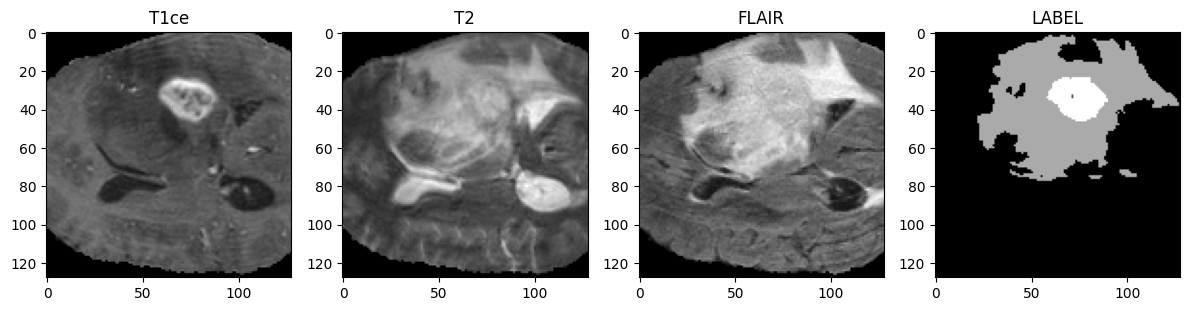

In [45]:
# Extract each modality
t1ce = img_np[:, :, :, 0]
t2 = img_np[:, :, :, 1]
flair = img_np[:, :, :, 2]
label = np.argmax(label_np, axis=-1)

# Create a figure and set up subplots
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

# Display the first image
axes[0].imshow(t1ce[:, :, 64], cmap='gray')
axes[0].set_title('T1ce')

# Display the second image
axes[1].imshow(t2[:, :, 64], cmap='gray')
axes[1].set_title('T2')

# Display the third image
axes[2].imshow(flair[:, :, 64], cmap='gray')
axes[2].set_title('FLAIR')

# Display the third image
axes[3].imshow(label[:, :, 64], cmap='gray')
axes[3].set_title('LABEL')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


## Save Each Slice as a ".npz" File as ['t1ce', 't2', 'flair', 'label']

In [52]:
# Save each slice as a new .npz file
for i in range(img_np.shape[2]):
    # Create a dictionary to store the modality slice
    slice_data = {'t1ce': t1ce[:, :, i], 't2': t2[:, :, i], 'flair': flair[:, :, i], 'label': label[:, :, i]}
    
    # Save the slice as an .npz file
    np.savez(f'{TEMP_DIR}slice_{i}.npz', **slice_data)


## Reading Back for Double Check

In [68]:
npz_name = "slice_30.npz"

DATA_DIR_ = TEMP_DIR + npz_name

zip = np.load(DATA_DIR_)
zip.files


['t1ce', 't2', 'flair', 'label']

In [69]:
t1ce_ = zip['t1ce']
t2_ = zip['t2']
flair_ = zip['flair']
label_ = zip['label']

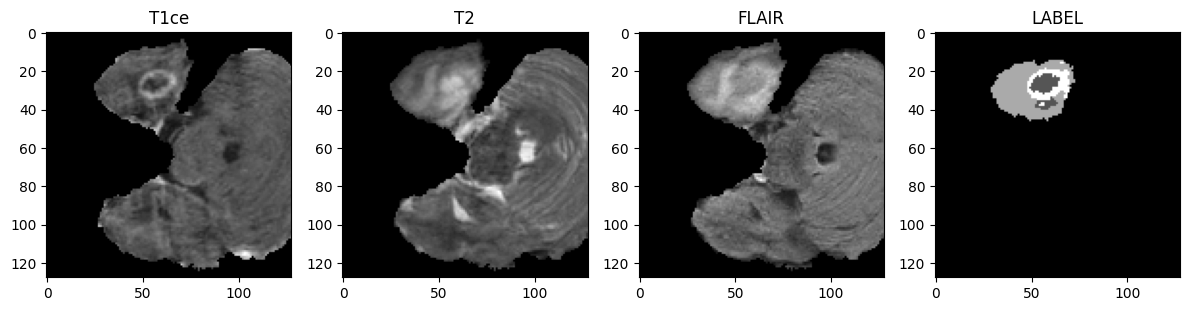

In [70]:
# Create a figure and set up subplots
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

# Display the first image
axes[0].imshow(t1ce_, cmap='gray')
axes[0].set_title('T1ce')

# Display the second image
axes[1].imshow(t2_, cmap='gray')
axes[1].set_title('T2')

# Display the third image
axes[2].imshow(flair_, cmap='gray')
axes[2].set_title('FLAIR')

# Display the third image
axes[3].imshow(label_, cmap='gray')
axes[3].set_title('LABEL')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

# Write a Script for Doing the Same for Each Cases

In [11]:
# List all files in the TRAIN_IMG_DIR directory
img_files = os.listdir(TRAIN_IMG_DIR)

for img_file in img_files:
    # Extract the case number from the image filename
    case_number = img_file.split('.')[0].split('_')[1]

    # Construct the label filename based on the case number
    label_file = "mask_" + case_number + ".npy"

    # Construct the full paths for image and label files
    img_path = os.path.join(TRAIN_IMG_DIR, img_file)
    label_path = os.path.join(TRAIN_LABEL_DIR, label_file)

    # Load the image and label
    img_np = np.load(img_path)
    label_np = np.load(label_path)

    # Extract each modality
    t1ce = img_np[:, :, :, 0]
    t2 = img_np[:, :, :, 1]
    flair = img_np[:, :, :, 2]
    label = np.argmax(label_np, axis=-1)

    # Save each slice as a new .npz file
    for i in range(img_np.shape[2]):
        # Construct the slice filename
        slice_filename = f"case{case_number.zfill(4)}_slice{i+1:03}.npz"

        # Create a dictionary to store the modality slice
        slice_data = {'t1ce': t1ce[:, :, i], 't2': t2[:, :, i], 'flair': flair[:, :, i], 'label': label[:, :, i]}

        # Save the slice as an .npz file
        np.savez(os.path.join(TEMP_DIR, slice_filename), **slice_data)


## Reading Back for Triple Check!

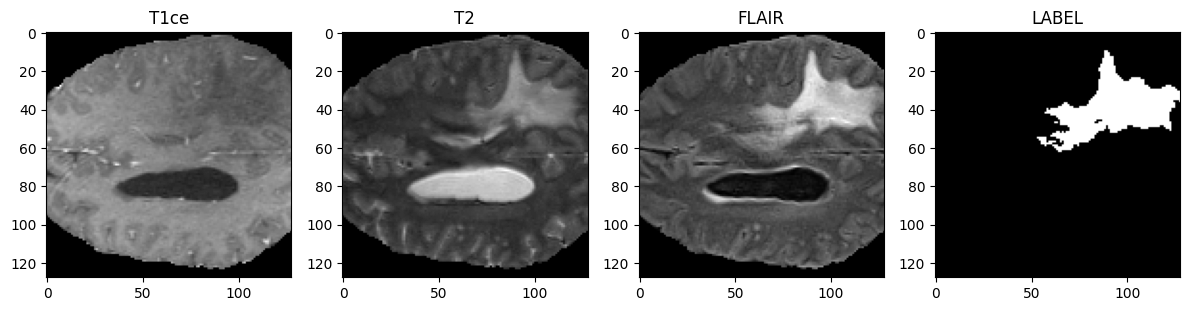

In [13]:
npz_name = "case0008_slice087.npz"

DATA_DIR_ = TEMP_DIR + npz_name

zip = np.load(DATA_DIR_)
zip.files

t1ce_ = zip['t1ce']
t2_ = zip['t2']
flair_ = zip['flair']
label_ = zip['label']

# Create a figure and set up subplots
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

# Display the first image
axes[0].imshow(t1ce_, cmap='gray')
axes[0].set_title('T1ce')

# Display the second image
axes[1].imshow(t2_, cmap='gray')
axes[1].set_title('T2')

# Display the third image
axes[2].imshow(flair_, cmap='gray')
axes[2].set_title('FLAIR')

# Display the third image
axes[3].imshow(label_, cmap='gray')
axes[3].set_title('LABEL')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


# Create List Files

 ## Write Cases to "train.txt"

In [2]:
# Set the directory where the files are located
folder_path = HOME_DIR + 'Synapse/train_npz'
print(folder_path)

# Get the list of filenames in the folder
file_names = os.listdir(folder_path)
print(file_names)

# Filter filenames to include only those with the .npz extension
file_names = [name for name in file_names if name.endswith(".npz")]

# Extract the case names from the filenames
case_names = [name[:-4] for name in file_names]  # Remove the ".npz" extension

# Write to a .txt file
output_file_path = os.path.join(HOME_DIR, "train.txt")

# Write the case names to the text file
with open(output_file_path, "w") as f:
    f.write("\n".join(case_names))


/content/drive/My Drive/itu/PhD/BLG 641E - Medical Image Computing/final project/Synapse/train_npz
['case0000_slice001.npz', 'case0000_slice002.npz', 'case0000_slice003.npz', 'case0000_slice004.npz', 'case0000_slice005.npz', 'case0000_slice006.npz', 'case0000_slice007.npz', 'case0000_slice008.npz', 'case0000_slice009.npz', 'case0000_slice010.npz', 'case0000_slice011.npz', 'case0000_slice012.npz', 'case0000_slice013.npz', 'case0000_slice014.npz', 'case0000_slice015.npz', 'case0000_slice016.npz', 'case0000_slice017.npz', 'case0000_slice018.npz', 'case0000_slice019.npz', 'case0000_slice020.npz', 'case0000_slice021.npz', 'case0000_slice022.npz', 'case0000_slice023.npz', 'case0000_slice024.npz', 'case0000_slice025.npz', 'case0000_slice026.npz', 'case0000_slice027.npz', 'case0000_slice028.npz', 'case0000_slice029.npz', 'case0000_slice030.npz', 'case0000_slice031.npz', 'case0000_slice032.npz', 'case0000_slice033.npz', 'case0000_slice034.npz', 'case0000_slice035.npz', 'case0000_slice036.npz', 

## Write Unique Cases to "all.lst"

In [5]:
# Set the directory where the files are located
folder_path = HOME_DIR + 'Synapse/train_npz'
print(folder_path)

# Get the list of filenames in the folder
file_names = os.listdir(folder_path)
print(file_names)

unique_cases = set()

for case in file_names:
    case_name = case[:9].replace('_', '') + '.npy.h5'
    unique_cases.add(case_name)

with open('all.lst', 'w') as file:
    for case in unique_cases:
        file.write(case + '\n')


/content/drive/My Drive/itu/PhD/BLG 641E - Medical Image Computing/final project/Synapse/train_npz
['case0000_slice001.npz', 'case0000_slice002.npz', 'case0000_slice003.npz', 'case0000_slice004.npz', 'case0000_slice005.npz', 'case0000_slice006.npz', 'case0000_slice007.npz', 'case0000_slice008.npz', 'case0000_slice009.npz', 'case0000_slice010.npz', 'case0000_slice011.npz', 'case0000_slice012.npz', 'case0000_slice013.npz', 'case0000_slice014.npz', 'case0000_slice015.npz', 'case0000_slice016.npz', 'case0000_slice017.npz', 'case0000_slice018.npz', 'case0000_slice019.npz', 'case0000_slice020.npz', 'case0000_slice021.npz', 'case0000_slice022.npz', 'case0000_slice023.npz', 'case0000_slice024.npz', 'case0000_slice025.npz', 'case0000_slice026.npz', 'case0000_slice027.npz', 'case0000_slice028.npz', 'case0000_slice029.npz', 'case0000_slice030.npz', 'case0000_slice031.npz', 'case0000_slice032.npz', 'case0000_slice033.npz', 'case0000_slice034.npz', 'case0000_slice035.npz', 'case0000_slice036.npz', 